# MCLP 설명

시설물의 개수 혹은 예산 비용이 제한되었을 때, 시설물의 서비스 수준을 높이기 위하여 주어진 제약조건 하에서 시설물이 커버하는 수요량을 최대화하는 위치를 선정하는 것

## 데이터

### Station을 입지 선정 세트
* 버스 정류장의 정보, 위도와 경도, 그리고 지리적 위치(geometry)


### Pop_traffic을 수요 지점
     
* 노드의 교통량(수요)과 지리적 위치(geometry) 포함





In [ ]:
#Pop traffic 위도,경도,weights
'''
    index  weights                       geometry
    0      0      100  POINT (14478385.090 4224535.949)
    1      1      200  POINT (14478525.150 4226214.016)
    2      2      150  POINT (14478665.210 4227892.083)
    3      3      300  POINT (14478805.270 4229570.150)
    4      4      250  POINT (14478945.330 4231248.217)
'''

'  \n    index  weights                       geometry\n    0      0      100  POINT (14478385.090 4224535.949)\n    1      1      200  POINT (14478525.150 4226214.016)\n    2      2      150  POINT (14478665.210 4227892.083)\n    3      3      300  POINT (14478805.270 4229570.150)\n    4      4      250  POINT (14478945.330 4231248.217)\n'

In [ ]:
# Station 정류장 위도 경도
'''

   정류소ID    lon   lat                       geometry
0        1  127.1  37.1  POINT (14478385.090 4224535.949)
1        2  127.2  37.2  POINT (14478525.150 4226214.016)
2        3  127.3  37.3  POINT (14478665.210 4227892.083)
3        4  127.4  37.4  POINT (14478805.270 4229570.150)
4        5  127.5  37.5  POINT (14478945.330 4231248.217)
'''

'\n\n   정류소ID    lon   lat                       geometry\n0        1  127.1  37.1  POINT (14478385.090 4224535.949)\n1        2  127.2  37.2  POINT (14478525.150 4226214.016)\n2        3  127.3  37.3  POINT (14478665.210 4227892.083)\n3        4  127.4  37.4  POINT (14478805.270 4229570.150)\n4        5  127.5  37.5  POINT (14478945.330 4231248.217)\n'

In [28]:
import pandas as pd
import geopandas as gpd
import random
import numpy as np

In [20]:
empty_house = pd.read_csv('houses.csv')
empty_house['weight'] = [random.randint(100, 700) for _ in range(len(empty_house))]
empty_house.head()

,시군구번호,도로명번호,건물본번,건물부번,시도,시군,읍면동,주소,빈집유형,주택유형,철거동의사항,lat,lng,weight
0,48890,4844006,593,5.0,경상남도,합천군,가야면,경상남도 합천군 가야면 가천1길 593-5,철거형,단독주택,미동의,35.749528,128.091118,362
1,48890,4844073,101,NaN,경상남도,합천군,가야면,경상남도 합천군 가야면 구미3길 101,활용형,단독주택,미동의,35.734573,128.110283,533
2,48890,4844072,284,NaN,경상남도,합천군,가야면,경상남도 합천군 가야면 구미2길 284,철거형,단독주택,미동의,35.741613,128.107865,423
3,48890,4844153,407,NaN,경상남도,합천군,가야면,경상남도 합천군 가야면 대전1길 407,철거형,단독주택,미동의,35.740285,128.088067,393
4,48890,4844154,478,1.0,경상남도,합천군,가야면,경상남도 합천군 가야면 대전2길 478-1,활용형,단독주택,미동의,35.741418,128.081231,247


In [25]:
# station = clustered_data
restaurant = pd.read_csv('restaurants.csv')
restaurant = restaurant[['업소명','lat', 'lng']]
# station이라는 Dataframe에서 ['정류소ID','lon', 'lat', 'geometry']만 사용
restaurant = gpd.GeoDataFrame(restaurant, geometry=gpd.points_from_xy(restaurant.lng, restaurant.lat))
#station['dv'] = ['y[%s]'%s for s in station.정류소ID ]
restaurant = restaurant.reset_index()
restaurant.head()

,index,업소명,lat,lng,geometry
0,0,삼가식육식당,35.413185,128.123394,POINT (128.12339 35.41318)
1,1,적사부[중식],35.567054,128.160334,POINT (128.16033 35.56705)
2,2,순할머니손칼국수,35.570328,128.162018,POINT (128.16202 35.57033)
3,3,3.3국밥앤국시,35.561331,128.154587,POINT (128.15459 35.56133)
4,4,대식한우명가,35.547759,128.084946,POINT (128.08495 35.54776)


In [26]:
# Geoseries로 되어 있지 않으면 lon과 lat 열을 추출
# GeoDataFrame을 생성후 필요없는 열을 제거
# 다음 인덱스 리셋, PoPxTraffic열을 weights로 변경
# if not isinstance(empty_house.geometry, gpd.geoseries.GeoSeries):
#     empty_house['lon'] = empty_house['geometry'].apply(lambda x: x[7:-1].split(' ')[0])
#     empty_house['lat'] = empty_house['geometry'].apply(lambda x: x[7:-1].split(' ')[1])
#     pop_traffic =  gpd.GeoDataFrame(empty_house, geometry=gpd.points_from_xy(empty_house.lon, empty_house.lat))
#     pop_traffic = pop_traffic.drop(['lon','lat'], axis=1)

empty_house = empty_house[['건물본번','weight','lat', 'lng']]

house = gpd.GeoDataFrame(empty_house, geometry=gpd.points_from_xy(empty_house.lng, empty_house.lat))
house.reset_index(inplace=True)

house.head()

,index,건물본번,weight,lat,lng,geometry
0,0,593,362,35.749528,128.091118,POINT (128.09112 35.74953)
1,1,101,533,35.734573,128.110283,POINT (128.11028 35.73457)
2,2,284,423,35.741613,128.107865,POINT (128.10787 35.74161)
3,3,407,393,35.740285,128.088067,POINT (128.08807 35.74028)
4,4,478,247,35.741418,128.081231,POINT (128.08123 35.74142)


In [27]:
# 특정 좌표계로 변환하기 위해 사용함
house.crs = 'epsg:4326'
restaurant.crs = 'epsg:4326'

house = house.to_crs(epsg=5179)
restaurant = restaurant.to_crs(epsg=5179)

In [30]:

# 각 인구-교통 지점과 정류장 지점 간의 거리를 계산하여 거리 행렬 d를 생성
# 최적화 문제에서 각 지점이 특정 정류장에 의해 커버될 수 있는지 여부를 결정
d = np.empty((len(house), len(restaurant)))
for i in range(len(house)):
    point_i = house.geometry[i]
    d[i] = [point_i.distance(point_j) for point_j in restaurant.geometry]
    if i % 2000 == 0:
        print('loading'+ '.'*(i//2000)+ '_'*(6-i//2000))
d.shape

loading______


(517, 83)

In [32]:
# 정류장사이의 거리
# 정류장 간에 최소 거리가 어느 정도 이상이어야 한다는 제약조건을 반영하기 위함.
r = np.empty((len(restaurant), len(restaurant)))
for i in range(len(restaurant)):
    station_i = restaurant.geometry[i]
    r[i] = [ station_i.distance(station_j) for station_j in restaurant.geometry]
r.shape

(83, 83)

In [37]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 41.9 MB/s eta 0:00:00


In [42]:
from pulp import LpProblem, LpMaximize, LpVariable, LpInteger, lpSum,LpStatus,value

In [43]:
# pop_traffic은 수요지점
# station은 시설 입지

I = house.index.values
J = restaurant.index.values
S = 400
min_dist = 50

a = house.weight.values
P = 30

# N은 각 인구-교통 지점이 커버될 수 있는 정류장의 리스트를 포함하는 리스트
# R은 정류장 사이의 거리가 최소 거리 min_dist보다 작은지 여부를 나타내는 0과 1의 값을 가지는 리스트
N = [[j for j in J if d[i][j] < S] for i in I]
R = [[int(r[station_i][station_j] < min_dist) for station_j in J ] for station_i in J]
# Formulate optimisation

prob = LpProblem("MCLP", LpMaximize)
x = LpVariable.dicts("x", J, lowBound=0, upBound=1, cat='Integer')
y = LpVariable.dicts("y", I, lowBound=0, upBound=1, cat='Integer')

# Objective
# 목적 함수 정의: prob += lpSum([a[i]*y[i] for i in I])
# 목표: 커버되는 총 가중치를 최대화하는 것.
# 작동 방식: 커버되는 인구-교통 지점의 가중치의 합을 최대화하려고, 인구-교통 지점이 커버될 때 y[i]가 1이 되고, 이 지점의 가중치 a[i]가 합산
prob += lpSum([a[i]*y[i] for i in I])

# 모든 인구-교통 지점은 적어도 하나의 정류장에 의해 커버
# 특정 거리 min_dist 내에 있는 정류장들 간에는 너무 가깝게 시설이 설치하지 않기 위함

# Constraints
for i in I:
    prob += lpSum([x[j] for j in N[i]]) >= y[i]
for j in J:
    prob += lpSum([x[rr] for rr in R[j]]) <= 1


prob += lpSum([x[j] for j in J]) == P

# Solve problem
prob.solve()

x_soln = np.array([x[j].varValue for j in J])

# And print some output
print (("Status:"), LpStatus[prob.status])
print ("Weight Covered is = ", value(prob.objective))
print ("x = ", x_soln)

Status: Optimal
Weight Covered is =  11341.0
x =  [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
import matplotlib.pyplot as plt

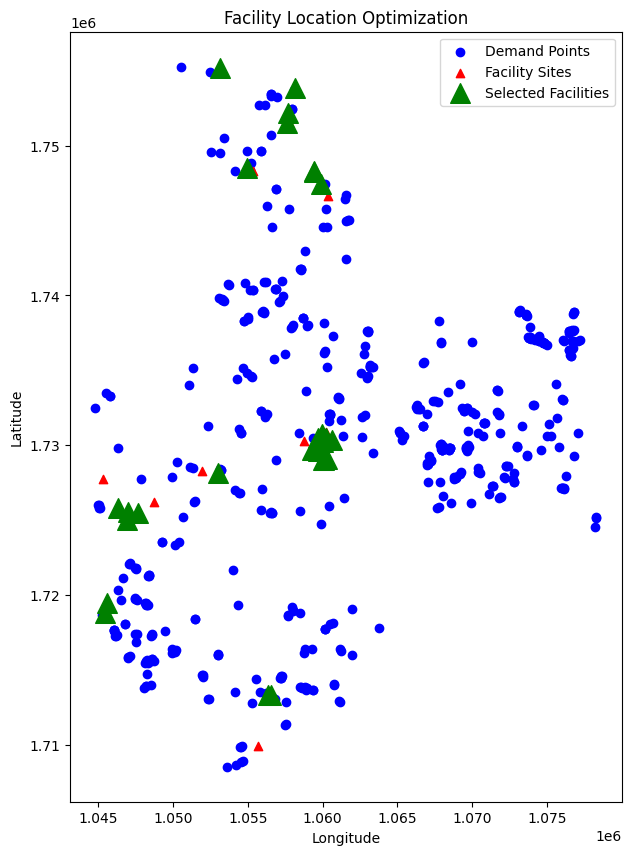

In [46]:
# Visualization
# house['geometry'] = house.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
# restaurant['geometry'] = restaurant.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

house_gdf = gpd.GeoDataFrame(house, geometry='geometry')
restaurant_gdf = gpd.GeoDataFrame(restaurant, geometry='geometry')

selected_restaurants = restaurant_gdf[x_soln == 1]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
house_gdf.plot(ax=ax, color='blue', label='Demand Points')
restaurant_gdf.plot(ax=ax, color='red', marker='^', label='Facility Sites')
selected_restaurants.plot(ax=ax, color='green', marker='^', label='Selected Facilities', markersize=200)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Facility Location Optimization')
plt.show()

## **데이터 수집 현황**

아래 카테고리와 같이 현재 위도, 경도 데이터만 존재
  
  1. 맛집 데이터
  2. 카페 데이터
  3. 숙박업소 데이터
  4. 관광지 데이터




## **선정해야 될 데이터**

## 1. 입지 선정 데이터


*  카페 데이터
*  맛집 데이터
*  빈집 데이터
*  카페 + 맛집 데이터

## 2. 수요 지점 데이터

* 교통량 데이터 ( 현재 존재하지 않음)
* 숙박시설 (리뷰수가 많은 것으로 weight 지정)
* 관광지 (순위와 sns에 언급한 수를 weight 지정)
* 관광지 (순위와 입장객이 가장 많은 수를 weight로 지정)

In [ ]:
station['opt'] = x_soln
station.head()

In [ ]:
opt_id = station[station['opt'] == 1]['정류소ID'].values
station_raw = pd.read_csv('1.수원시_버스정류장.csv')
station_raw['optimal'] = station_raw['정류장ID'].apply(lambda x: x in opt_id)
station_raw[station_raw['optimal'] == True]

In [ ]:
scat1 = pdk.Layer('ScatterplotLayer',
                  station_raw[station_raw['optimal']==0],
                  get_position = ['lon','lat'],
                  get_fill_color='[0,255,0]',
                  get_radius=50,
                  opacity = 0.1,
                  pickable=True, auto_highlight=True
                 )

scat2 = pdk.Layer('ScatterplotLayer',
                  station_raw[station_raw['optimal']==1],
                  get_position = ['lon','lat'],
                  get_fill_color='[127,255,212]',
                  get_radius=200,
                  pickable=True, auto_highlight=True
                 )

center = center
view_state = pdk.ViewState(
    longitude=center[1],
    latitude=center[0],
    zoom=11
)
r = pdk.Deck(layers=[base, scat1, scat2], initial_view_state=view_state,
            mapbox_key = "pk.eyJ1IjoiamFzb243NjU1IiwiYSI6ImNrbTF6ODV2ajBubHgydm05Y2dsZmhnbXoifQ.HqZQtFRrorSuizkwe6kpFg")
r.to_html()

## 선정 결과에서 접근성 및 편의성 확인
- 지하철역의 위치정보

In [ ]:
subway = pd.read_csv('8.수원시_지하철역_위치정보.csv')
subway = subway.rename(columns = {'역사명':'역명', '노선명':'호선명'})
subway.head()

In [ ]:
landmark_dict = {'랜드마크':['광교호수공원', '국토지리정보원지도박물관','만석공원','방화수류정',
                        '화성행궁', '서호공원', '광교저수지쉼터', '롯데백화점 수원점',
                        'NC백화점 수원터미널점', 'AK플라자 수원점', '갤러리아백화점 광교'],
                'lon':[127.0637281,127.0529836, 126.9989156, 127.015922,
                      127.0115454,126.9882966,127.0105735,126.9950386,
                      127.0180337,126.9981621,127.0527941],
                'lat':[37.283123, 37.2761374, 37.3007055,37.2875274,
                      37.281962,37.2803729,37.3068497,37.264328,
                      37.2500302,37.2654804,37.2805385]}
landmark = pd.DataFrame(landmark_dict)
landmark

In [ ]:
scat3 = pdk.Layer('ScatterplotLayer',
                  subway,
                  get_position = ['lon','lat'],
                  get_fill_color='[255,100,0]',
                  get_radius=150,
                  pickable=True, auto_highlight=True
                 )

scat4 = pdk.Layer('ScatterplotLayer',
                  landmark,
                  get_position = ['lon','lat'],
                  get_fill_color='[255,255,0]',
                  get_radius=150,
                  pickable=True, auto_highlight=True
                 )

center = center
view_state = pdk.ViewState(
    longitude=center[1],
    latitude=center[0],
    zoom=11
)
r = pdk.Deck(layers=[base, scat1, scat2, scat3, scat4], initial_view_state=view_state,
            mapbox_key = "pk.eyJ1IjoiamFzb243NjU1IiwiYSI6ImNrbTF6ODV2ajBubHgydm05Y2dsZmhnbXoifQ.HqZQtFRrorSuizkwe6kpFg")
r.to_html()

# 최종 입지선정 결과

In [ ]:
pop = pop_gender.drop(['lon','lat','TOTAL'], axis=1)
column_list = [f'{age}대 남성' for age in range(10, 60, 10)] + ['60대 이상 남성']
column_list += [f'{age}대 여성 ' for age in range(10, 60, 10)] + ['60대 이상 여성']
pop.columns = column_list + ['geometry']
pop.crs = 'epsg:4326'
pop.head(3)

In [ ]:
0.92/0.77

In [ ]:
# 논문 "광고유형 및 성별에 따른 광고효과와 정서반응 패턴, 정은경 외, 2012"에 따르면 여성은 약 1.2배 더 큰 광고 효과를 가짐
for col in [f'{age}대 여성 ' for age in range(10, 60, 10)] + ['60대 이상 여성']:
    pop[col] = pop[col]*(0.92/0.77)

In [ ]:
station_ver4 = station_ver3[['정류소ID', '정류장명','lon','lat','BUFFER']]
station_ver4['optimal'] = station_ver4['정류소ID'].apply(lambda x: x in opt_id)
station_ver4 = station_ver4[station_ver4['optimal'] == True]

for col in tqdm(column_list):
    station_ver4[col] = station_ver4['BUFFER'].apply(lambda x: pop_within_buffer(pop, col, x))
station_ver4.sample(1)

In [ ]:
#광고 타겟층 선정
advertise_target = []
for i in range(len(station_ver4)):
    target_list = station_ver4[column_list].iloc[i,:]
    advertise_target.append(target_list.idxmax())

station_ver4['광고 Target층'] = advertise_target
station_final = station_ver4.drop(['optimal'] + column_list, axis=1)
station_final.head(1)

In [ ]:
pop_traffic = pd.read_csv('pop_traffic_final.csv')

if not isinstance(pop_traffic.geometry, gpd.geoseries.GeoSeries):
    pop_traffic['lon'] = pop_traffic['geometry'].apply(lambda x: x[7:-1].split(' ')[0])
    pop_traffic['lat'] = pop_traffic['geometry'].apply(lambda x: x[7:-1].split(' ')[1])
    pop_traffic =  gpd.GeoDataFrame(pop_traffic, geometry=gpd.points_from_xy(pop_traffic.lon, pop_traffic.lat))
    pop_traffic = pop_traffic.drop(['lon','lat'], axis=1)
pop_traffic.reset_index(inplace=True)
pop_traffic.crs = 'epsg:4326'
pop_traffic.head(3)

In [ ]:
# 선정된 POP x TRAFFIC 기준으로 순위 산정
station_final['order'] = station_final['BUFFER'].apply(lambda x: pop_within_buffer(pop_traffic, 'POPxTRAFFIC', x))
station_final = station_final.sort_values(['order'],ascending= False).reset_index()
station_final = station_final.drop(['BUFFER','order'], axis=1)

station_final['index'] = range(1, 31)
station_final.rename(columns = {'정류소ID':'정류장ID','index' : '설치순위', 'lon':'X축좌표(경도)', 'lat':'Y축좌표(위도)'}, inplace = True)
station_final = station_final[['설치순위','정류장명','정류장ID','X축좌표(경도)','Y축좌표(위도)','광고 Target층']]
station_final

In [ ]:
station_final.to_csv('분석결과_수타버스.csv')

# 잡동사니

## 취약계층(인구정보)

from shapely.geometry import Polygon

older = gpd.read_file('17.수원시_인구정보(고령)_격자.geojson')
older['geometry'] = older['geometry'].apply(lambda x: x.centroid)
older.head()

## 반경 내에 취약계층(older) 평균 추가
import shapely.speedups
shapely.speedups.enable()
from shapely.geometry import Point

def pop_within_buffer(df, column, poly):
    in_out = df.within(poly)
    within_buffer = df[in_out]
    return np.mean(within_buffer[column])

station_ver1['older'] = station_ver1['BUFFER'].apply(lambda x: pop_within_buffer(older, 'val', x))
station_ver1.head()

## 유소년에 대해서도 똑같이 해줌
youth = gpd.read_file('19.수원시_인구정보(유소년)_격자.geojson')
youth['geometry'] = youth['geometry'].apply(lambda x: x.centroid)

station_1['youth'] = station_1['youth'].apply(lambda x: pop_within_buffer(youth, 'val', x))
station_1.head()